# Report for CS165A  Coding Project 1: Classifier Agent

### Name: Karankumar Mageswaran
### PERM \#:5486899


## Declaration of Sources and Collaboration:
Collaborators: Mihir Bharti

Sources:

https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

https://en.wikipedia.org/wiki/Stop_word

https://en.wikipedia.org/wiki/N-gram

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

https://ipullrank.com/ultimate-guide-to-tf-idf-content-optimization



## Part 1:  Gradient Calculations

The loss function to use is the cross-entropy loss, averaged over data points.

You should include your work for deriving the full gradient and stochastic gradient here.

Recall that the loss function is defined as
$$
\ell_i(w,(x_i, y_i) = -\left(y_i\log(p_w(x_i))+(1-y_i)\log(1 - p_w(x_i))\right) \\
$$
where
$$
p_w(x,y) = \frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}
$$

Then, by substituting $p_w(x_i,y_i)$ expanding, and simplifying with log rules, we can derive a simplified version of the log function

\begin{align*}
\ell_i(w,(x_i, y_i)) 
&= -\left(y_i\log(p_w(x_i))+(1-y_i)\log(1 - p_w(x_i))\right) \\[10pt]
&= -\left(y_i\log\left(\frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)+(1-y_i)\log\left(1 - \frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)\right) \\[10pt]
&= -\left(y_i\log\left(\frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)+(1-y_i)\log\left(\frac{1+\exp(w^Tx_i)}{1+\exp(w^Tx_i)} - \frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)\right) \\[10pt]
&= -\left(y_i\log\left(\frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)+(1-y_i)\log\left(\frac{1}{1+\exp(w^Tx_i)}\right)\right) \\[10pt]
&= -\left(y_i\left(\log\left(\frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)-\log\left(\frac{1}{1+\exp(w^tx_i)}\right)\right)+\log\left(\frac{1}{1+\exp(w^Tx_i)}\right)\right) \\[10pt]
&= -\left(y_i\log(\exp(w^Tx_i))-\log(1+\exp(w^Tx_i))\right) \\[10pt]
&= \boxed{-\left(y_iw^Tx_i-\log(1+\exp(w^Tx_i))\right)}
\end{align*}

Now, we can use this loss function to derive the gradient (in terms of $x_i$, $y_i$, and $p_w(x_i)$!)
\begin{align*}
\frac{\partial\ell_i}{\partial w}
&= -\left(y_ix_i-\frac{1}{1+\exp(w^Tx_i)}\cdot\frac{\partial}{\partial w}(1+\exp{w^Tx_i})\right) \\[10pt]
&= -\left(y_ix_i-\frac{x_i\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right) \\[10pt]
&= \left(x_i\left(\left(\frac{\exp(w^Tx_i)}{1+\exp(w^Tx_i)}\right)-y_i\right)\right) \\[10pt]
&= \boxed{(x_i(p_w(x_i)-y_i))}
\end{align*}


## Part 2:  Gradient Descent vs Stochastic Gradient Descent

Discuss what do you observe about GD and SGD from your implementation? Which one is faster in terms of number of iterations, which one is faster in terms of the wall clock time?

Plot the learning curves, e.g., training error against epochs and wall-clock time.

You will use matplotlib for plotting such figures.

<h3>Wall-Clock Time

I used the ```time()``` function in the ```time``` module to compute the wall-clock time for each epoch in SGD and each iteration in GD, and plotted these below. I've also shown the output from my runs. I ran SGD for 3 epochs (1000 iterations) and GD for 100 iterations. I only graphed the first 10 iterations since the trend is easy to see, I have also shown the output of both runs for reference.

NOTE: These are from my```custom_feature_extractor``` so it is much slower than my regular BoW implementation, which only takes about 3-4 seconds for each epoch with SGD!!!

<h5>SGD</h5>

```
Loading and processing data ...
Training using SGD for  3 data passes.
epoch = 0 iter= 10000 loss =  0.09668442653887337 error =  0.0335 in 32.30426597595215 seconds
epoch = 1 iter= 20000 loss =  0.04022027671490815 error =  0.0134 in 61.87721490859985 seconds
epoch = 2 iter= 30000 loss =  0.016219013857573295 error =  0.0038 in 92.24590492248535 seconds
Test error =   0.13866666666666667
```
    
<h5>GD</h5>

```
Creating a classifier agent:
Loading and processing data ...
Training using GD for  100 iterations.
iter = 0 loss =  0.6921067561462388 error =  0.1217 in 62.76205110549927 seconds
iter = 1 loss =  0.6910703575184151 error =  0.1206 in 66.2434139251709 seconds
...
iter = 99 loss =  0.6042559625283471 error =  0.0612 in 404.3466110229492 seconds
iter = 100 loss =  0.6034924185945737 error =  0.061 in 407.7953999042511 seconds
```

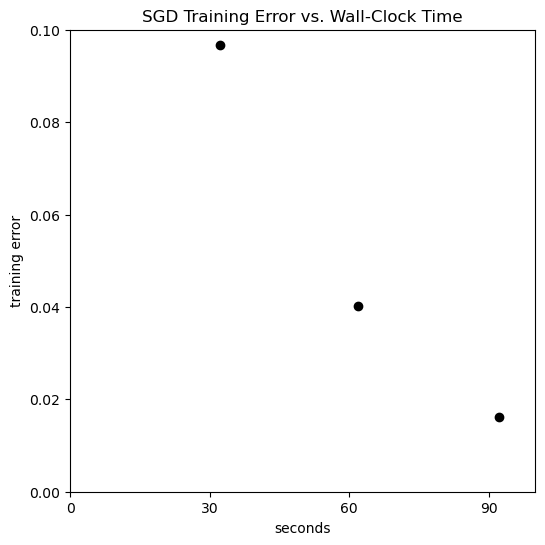

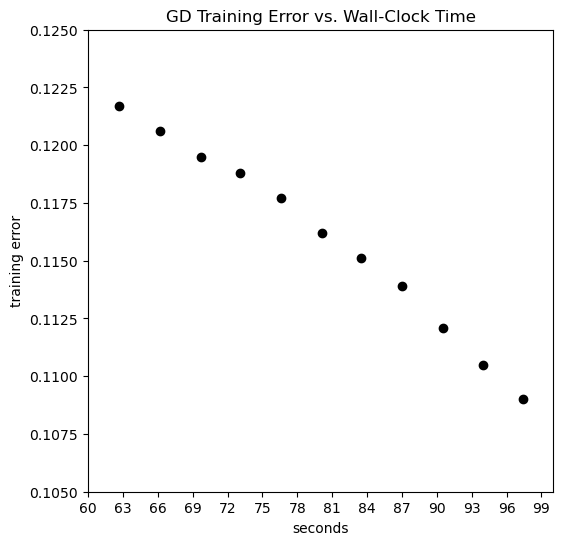

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([32.3], [.09668], 'ko')
plt.plot([61.9], [.04022], 'ko')
plt.plot([92.3], [.01622], 'ko')
plt.axis([0,100, 0, 0.1])
ax.xaxis.set_major_locator(plticker.MultipleLocator())
plt.xlabel("seconds")
plt.ylabel("training error")
plt.title("SGD Training Error vs. Wall-Clock Time")
loc = plticker.MultipleLocator(base=30.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([62.7], [0.1217], 'ko')
plt.plot([66.2], [0.1206], 'ko')
plt.plot([69.7], [0.1195], 'ko')
plt.plot([73.1], [0.1188], 'ko')
plt.plot([76.6], [0.1177], 'ko')
plt.plot([80.1], [0.1162], 'ko')
plt.plot([83.5], [0.1151], 'ko')
plt.plot([87.0], [0.1139], 'ko')
plt.plot([90.5], [0.1121], 'ko')
plt.plot([94.0], [0.1105], 'ko')
plt.plot([97.4], [0.109], 'ko')
plt.axis([60,100, 0.105, 0.125])
ax.xaxis.set_major_locator(plticker.MultipleLocator())
plt.xlabel("seconds")
plt.ylabel("training error")
plt.title("GD Training Error vs. Wall-Clock Time")
loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()


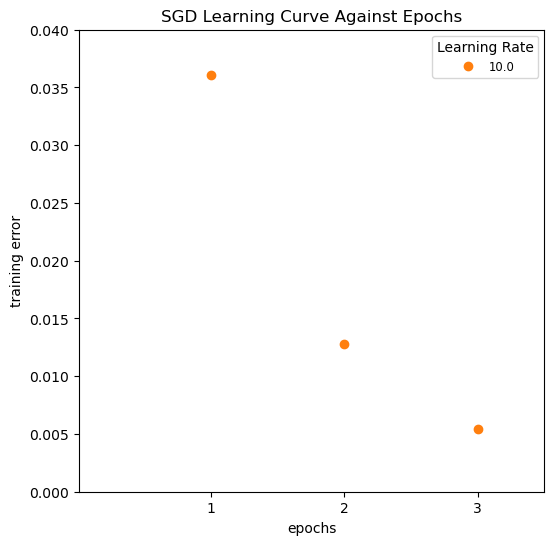

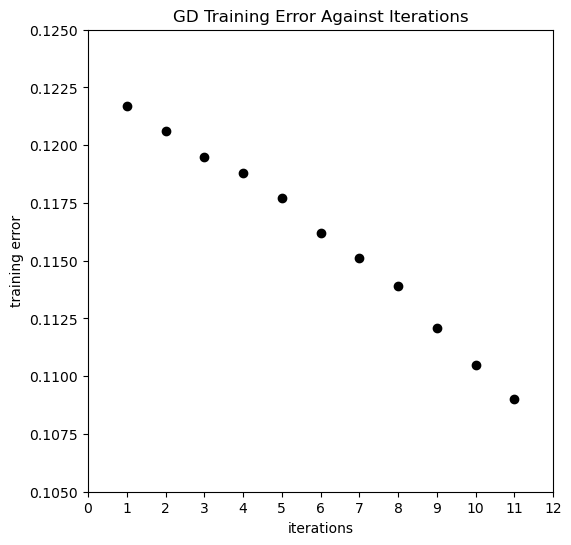

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([1,2,3], [.0361,.0128,.0054], 'o', color='C1',label='10.0')
plt.axis([0.01, 3.5, 0, 0.04])
ax.xaxis.set_major_locator(plticker.MultipleLocator())
plt.xlabel("epochs")
plt.ylabel("training error")
plt.legend(title="Learning Rate", fancybox=True, fontsize='small')
plt.title("SGD Learning Curve Against Epochs")
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([1], [0.1217], 'ko')
plt.plot([2], [0.1206], 'ko')
plt.plot([3], [0.1195], 'ko')
plt.plot([4], [0.1188], 'ko')
plt.plot([5], [0.1177], 'ko')
plt.plot([6], [0.1162], 'ko')
plt.plot([7], [0.1151], 'ko')
plt.plot([8], [0.1139], 'ko')
plt.plot([9], [0.1121], 'ko')
plt.plot([10], [0.1105], 'ko')
plt.plot([11], [0.109], 'ko')
plt.axis([0,12, 0.105, 0.125])
ax.xaxis.set_major_locator(plticker.MultipleLocator())
plt.xlabel("iterations")
plt.ylabel("training error")
plt.title("GD Training Error Against Iterations")
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

You can see that the SGD is running on average about 30 seconds per epoch, which is equivalent to 30/100 = 0.3 seconds per iteration. GD, on the other hand, runs at LEAST 3 seconds per iteration. Therefore, it is clear that SGD is at least 10 times faster than GD. However, upon completion of 200 iterations of GD, our training error is around 0.03, which took SGD about 1000 iterations to reach. 

So, by training error, GD is more efficient PER ITERATION, but SGD is more efficient PER SECOND.

## Part 3: Apply the model to your own text

In [3]:
from classifier_solved import load_data,tokenize, tf_idf
from classifier_solved import custom_feature_extractor, classifier_agent
import numpy as np

# First load the classifier

with open('data/vocab.txt') as file:
    reading = file.readlines()
    vocab_list = [item.strip() for item in reading]

    
# By default this is doing the bag of words, change this into your custom feature extractor
# so it works with your "best_model.npy"
sentences_pos = load_data("data/training_pos.txt")
sentences_neg = load_data("data/training_neg.txt")
train_sentences = sentences_pos + sentences_neg

sklearn_obj = tf_idf(vocab_list,tokenize, train_sentences)
feat_map = custom_feature_extractor(vocab_list,tokenize,sklearn_obj)

d = len(vocab_list)
params = np.array([0.0 for i in range(d)])
custom_classifier = classifier_agent(feat_map, params)
custom_classifier.load_params_from_file('best_model.npy')

In [4]:
# Try it out!

pos_sentence = "I really enjoyed watching it!"
neg_sentence = "I had high hopes for this movie, and I expected to love it, but it was awful!"

ypred = custom_classifier.predict(pos_sentence,RAW_TEXT=True)
ypred2 = custom_classifier.predict(neg_sentence,RAW_TEXT=True)

ypred = "Positive" if ypred == 1 else "Negative"
ypred2 = "Positive" if ypred2 == 1 else "Negative"
print(ypred,",",ypred2)

Positive , Negative


### We can also try predicting for each word in the input so as to get a sense of how the classifier arrived at the prediction

In [14]:
import pandas as pd
# function for set text color of positive
# values in Dataframes
def color_predictions(val):
    eps = 0.02
    if isinstance(val,float):
        if val > eps:
            color = 'blue'
        elif val < -eps:
            color = 'red'
        else:
            color = 'black'
    else:
        color='black'
    return 'color: %s' % color

my_sentence_list = tokenize(neg_sentence)
ypred_per_word = custom_classifier.predict(my_sentence_list,RAW_TEXT=True,RETURN_SCORE=True)

df = pd.DataFrame([my_sentence_list,ypred_per_word])

df.style.applymap(color_predictions)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,i,had,high,hopes,for,this,movie,and,i,expected,to,love,it,but,it,was,awful
1,0.000000,0.000000,0.001351,-0.001189,0.000000,0.000000,-0.045591,0.000000,0.000000,-0.002667,0.000000,0.033057,0.000000,0.000000,0.000000,0.000000,-0.030765


### Answer the questions: 

<h5>1. Are the above results making intuitive sense and why?</h5>

Yes! With some mental gymnastics, it is possible once can decipher a justification for the agent's score at each word. Take the given example sentence. 

- The score is a little higher than expected at the word "the" (in both occurences)

- The word "book" seems to carry a very negative connotation. It is likely that, in most movie reviews where a "book" version is brought up, the movie review tends to be negative. This makes sense with personal experience since most movies that are based off of books often fail to meet expectations and do not provide the same experience as reading the book.

- The score remains neutral as the sentence carries on since the words "really really good" can be either good or bad depending on whether or not the adjectives are being used to describe the movie or not. 

- I cannot seem to explain why the score seems to shoot up more at the word "movie."

- The words "just dreadful" brings the score down to a solid negative score of -0.28. This obviously makes sense since, if a reviewer is taking the time to call something dreadful in a movie review, it very likely is about the movie.

Let's do a similar analysis with my own sentence. Note that we have less thinking to do here, and the algorithm's "thought process" is much more clear because we used a custom tf-idf + n-gram + stop-word feature extractor which is better at focussing at the important words.

- The score went up at the word "high" as expected. "High" can be considered a generally positive word.

- However, that score tanks once again as soon as it reads "hopes!" This makes sense since the tf-idf extractor, which is using a 3-gram analysis, notices that "high hopes" isn't used in movie reviews unless there is a "catch"! 

- Similarly, the score increase at "expected" and "love," but promptly tanked once again at the word "awful," which is a very clear indicator that this is a bad review of the movie.

Another thing we see here that makes intuitive sense is that the score for the insignificant / common words such as "i" and "and" have a score of 0. This is the result of both stop-words and tf-idf filtering out these words since they are insignificant to the evaluation of the review. This is really cool to see in action!

<h5>2. What are some limitation of a linear classifier with BoW features?</h5>

A linear classifier with BoW features has a very significant drawback: the agent will never know the context. It is simply analzying the frequency of each word individually, and this means that there is no way for the agent to know what the word it is analyzing may be describing. For example, the word "good" could be used to describe a movie in a positive review, but it may be used to describe a book the movie is based off of in a negative review. These "extreme" words could lie on both the far positive and far negative ends of a graph, making it difficult for a linear classifier to decide whether these words have a positive or negative connotation in a review. 

In addition, the word "but" following any adjective could completely change the context of the adjective in the sentence, but a simple BoW feature extractor cannot use this information since it does not know the order of the words in the review. 

Also, the BoW feature extractor uses a vocabulary that is cluttered with words involving typos and random bits of HTML. These have no effect on the movie review since they are not valid English words, although the agent will try to find a correlation for these words anyway; if it happens to do so, then this will lead to inaccuracies!

Another limitation of the BoW words classifier is that it requires a carefully designed and compiled vocabulary, unlike the one provided which contained junk words such as html codes (although the one provided would have also taken computing time and space to generate and use). It impacts the sparsity of document representations.

Finally, we are forced to use sparse representations which limits our ability to compute and model certain loss functions and gradient functions (in our case, the derivation worked out nicely to contain the score function, but this may not always be the case!)

<h5>3. What are some ideas you can come up with to overcome these limitations (i.e., what are your ideas of constructing informative features)?</h5>

The first obvious solution would be to use an n-gram feature extractor. Although such a feature extractor would still lack context, it would gain a little bit of context since it now knows the order of a few pairs or lists of words. This sovles problems such as the word "but", when followed by a strong adjective, completely changing the connotation. Now that the agent can look at phrases, it is guaranteed to get a better understanding of the movie review. 

The next solution would be to use a tf-idf feature extractor. tf-idf works by not only keeping track of the bag of words count (term frequency - tf), but also counterbalances this count by the number of documents in which it is present (inverse document frequency -idf). Therefore, it not only takes into account the sheer count of the words, but also its appearance in the various documents, in this case movie reviews. This allows the algorithm to automatically ignore words such as "the" and "are" which show up often, and are of little significance to the 'positive-ness' or 'negative-ness' of the movie review.

This leads nicely into our final solution, using stop-words. Stop-words tells the algorithm to ignore words from a pre-determined fixed list of words that are known to be insignificant. There is no single universal list of stop words used by all language processing tools, but we have some pretty good off-the-shelf ones that can do the trick.

## Part 4: Document what you did for custom feature extractors 

<h4>Design of the custom feature extractor

1. tf-idf
2. 3-gram count
3. stop-words

My custom feature extractor uses the off-the-shelf sklearn feature extractor. Specifically, I used the TfidfVectorizer() function in the sklearn package. This feature extractor was great not only because it abstracted away the details of tf-idf and computed the values for me, it also allowed for easy implementation of other features. For example, the vectorizor came with a "stopwords" attribute. I used the default "english" value which tells the Vectorizer to use the pre-determined off-the-shelf stop-words list from sklearn text. It also came with an "ngram_range" attribute, which allowed me to easily tune the n-gram range of the feature extractor. After some experimientation, I landed on a range from [1,3] for my feature extractor. It seemed like 1-3 worked better than 1-1 and 1-2 on average, but if I went too high, such as 1-4 or 1-5, the test error seemed to go up; this might be because it was analyzing "too specific" combinations of words which might not have much significance.

<h4> Testing of the custom feature extractor

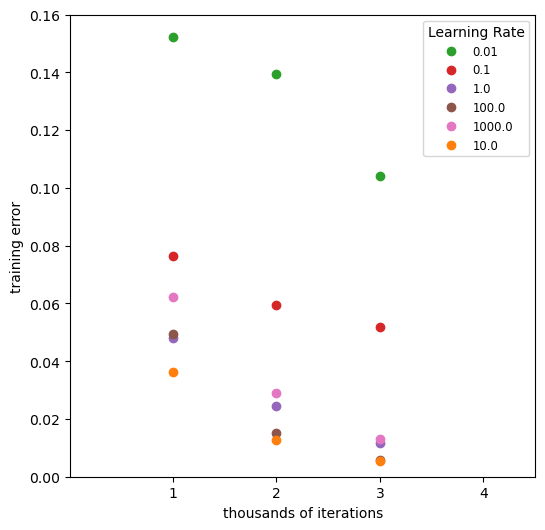

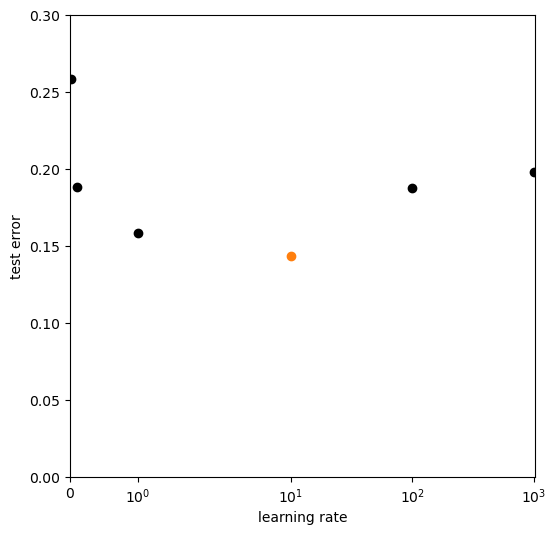

In [6]:
from classifier_solved import load_data,tokenize, tf_idf
from classifier_solved import custom_feature_extractor, classifier_agent
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([1,2,3], [.1522,.1395,.1043], 'o', color='C2', label='0.01')
plt.plot([1,2,3], [.0765,.0595,.0519], 'o', color='C3',label='0.1')
plt.plot([1,2,3], [.0479,.0244,.0117], 'o', color='C4',label='1.0')
plt.plot([1,2,3], [.0493,.0150,.0057], 'o', color='C5',label='100.0')
plt.plot([1,2,3], [.0623,.0291,.013], 'o', color='C6',label='1000.0')
plt.plot([1,2,3], [.0361,.0128,.0054], 'o', color='C1',label='10.0')
plt.axis([0.01, 4.5, 0, 0.16])
ax.xaxis.set_major_locator(plticker.MultipleLocator())
plt.xlabel("thousands of iterations")
plt.ylabel("training error")
plt.legend(title="Learning Rate", fancybox=True, fontsize='small')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([0.01], [0.2587], 'ko', label='0.01')
plt.plot([0.10], [.1887], 'ko', label='0.1')
plt.plot([1], [.1587], 'ko', label='1.0')
plt.plot([10], [.1437], 'o', color='C1', label='10.0')
plt.plot([100], [.188], 'ko', label='100.0')
plt.plot([1000], [.198], 'ko', label='1000.0')
plt.axis([0, 1025, 0, 0.3])
plt.xlabel("learning rate")
plt.ylabel("test error")
plt.xscale("symlog")
plt.show()

As you can see above, I tested various learning rates to find the best range for my custom feature extractor. I was expecting the training errors to steadliy get better as I ncreased the learning rate until a certian point at which the errors will begin to wildly fluctuate and diverge. However, I noticed a shallow "peak" in efficiency around 10 learning rate and a steady decline in efficiency in higher values, although there was no wild fluctuations in the error. I'm sure I would have found those fluctuations had I gone even higher, but I found that values around 10 for the learning rate worked best. You can also see I got the lowest test error with 10. Ultimately, after some more going back and forth with the learning rate, I got my best score with a learning rate of 12.5.

I also experimented with the number of epochs, however I noticed that with more than 3 epochs, it began to over-fit and saw an increase in test error; And less than 3 epochs didn't seem like enough for the data to converge unless the learning rate was suboptimally high. Therefore, 3 seemed like a good value to stick at. 

<h4> Final Accuracy

My feature extractor used sklearn tf-idf, ngram range of 1 to 3, and an off-the-shelf english stop-words list. Finally, with 3 epochs, a learning rate of 12.5, I managed to get a test of 86.2, beating the TA tfidf-based baseline!

## Part 5:  Anything else you'd like to write about. Your instructor / TA will read them.

You may answer for instance:

- What have you learned from the experience of working on this coding project?

- Do you think it is easy / hard? If you find it to be hard, what is the main missing piece that you think the instructor / TA should cover in the lectures / discussion sections.

- Have you taken CS165B? Was there a similar project in CS165B? What are the key differences?

- I really enjoyed the project, and this has really helped demistify the "daunting" factor of Artificial Intelligence and its complexity. Being able to make a classifier agent in such a short period of time was something I didn't know was possible before attending this class. In addition, it has really helped me understand the nitty gritty details of implementing such an agent, mainly the object-oriented-programming aspect; specifically, what classes, attributes, and methods are needed.
- I think the hardest part of this lab was coming up with the derivation for the gradient descent. It took me a while to realize we could first simplify the loss function in a way that allowed us to use the probability score function IN the derivation as a substitution, which helped perform the calcualtion easily on the sparse matrix. I think the main missing piece was this in lectures: that there was a trick like this to being able to solve the graident descent function. We went over the log-sum-exp trick rather quickly.
- I have not taken CS165B